In [ ]:
!pip install quantdsl

In [1]:
contract_model = """
from quantdsl.lib.powerplant2 import PowerPlant, Hot, Cold
        
PowerPlant(Date('2012-1-1'), Date('2012-1-12'), Cold())
"""

market_model = {
    'name': 'quantdsl.priceprocess.blackscholes.BlackScholesPriceProcess',
    'market': ['GAS', 'POWER'],
    'sigma': [0.1, 0.1],
    'rho': [[1.0, 0.8], [0.8, 1.0]],
    'curve': {
        'GAS': [
            ('2011-1-1', 1),
            ('2012-1-1', 13.5),
            ('2012-1-2', 19.4),
            ('2012-1-3', 10.5),
            ('2012-1-4', 10.3),
            ('2012-1-5', 10.1),
            ('2012-1-6', 10.2),
        ],
        'POWER': [
            ('2011-1-1', 11),
            ('2012-1-1', 15.5),
            ('2012-1-2', 14.0),
            ('2012-1-3', 15.0),
            ('2012-1-4', 11.0),
            ('2012-1-5', 1.0),
            ('2012-1-6', 15.0),
        ]
    }
}


In [4]:
from quantdsl import calc

results = calc(contract_model,
    price_process=market_model,
    observation_date='2011-1-1',
    interest_rate=2.5,
    periodisation='daily',
    path_count=20000,
    perturbation_factor=0.01,
    verbose=True
)

Compiled 79 nodes 
Compilation in 0.430s
Simulation in 0.123s
Starting 1267 node evaluations, please wait...
1267/1267 100.00% complete 106.59 eval/s running 12s eta 0s     
Evaluation in 11.886s


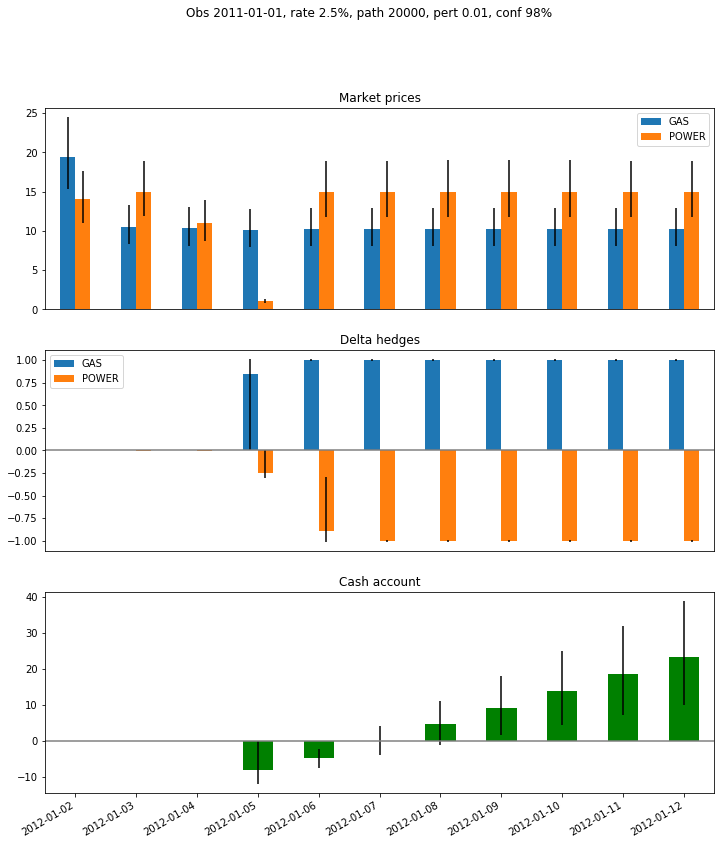

In [5]:
results.plot(
    confidence_interval=98,
    figsize=(12, 14)
)
